In [1]:
import cv2
import numpy as np
from skimage.feature import hog
#from sklearn.svm import LinearSVC
#from sklearn.svm import SVC
from sklearn.svm import SVC
svc = SVC()
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
 
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)
 
#cho x_test
X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = SVC(C=10, probability=True)
model.fit(X_train_feature,y_train)
y_pre = model.predict(X_test_feature)
print(accuracy_score(y_test,y_pre))

0.9496


99.9


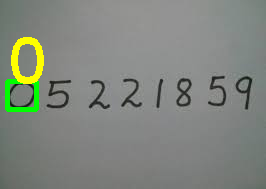

95.2


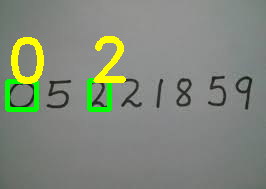

93.9


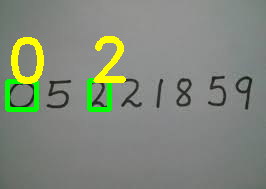

ti le nhan dang thap hon 95
100.0


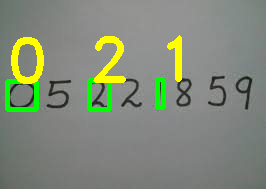

99.3


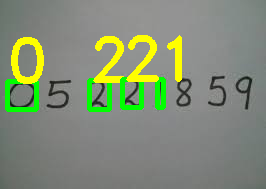

98.3


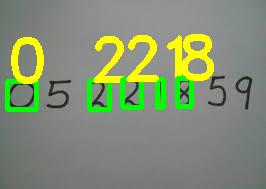

97.8


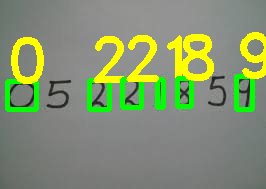

99.8


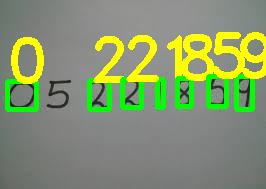

In [11]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/digit.jpg")
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
   
    roi = thre[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    per = model.predict_proba(np.array([roi_hog_fd], np.float32))[0]
    per = float(str(round(per[nbr][0]*100,1)));
    print(per)

    if per > 95:
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
      cv2_imshow(image)
    else:
      cv2_imshow(image)
      print('ti le nhan dang thap hon 95')

# cv2.imwrite("image_pand.jpg",image)
cv2.waitKey()
cv2.destroyAllWindows()
